In [1]:

import numpy as np
import pandas as pd 


df = pd.read_csv('../input/xAPI-Edu-Data.csv')
# Any results you write to the current directory are saved as output.
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [2]:
print(df.shape)

(480, 17)


In [3]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

**Data Visualization and Exploration**


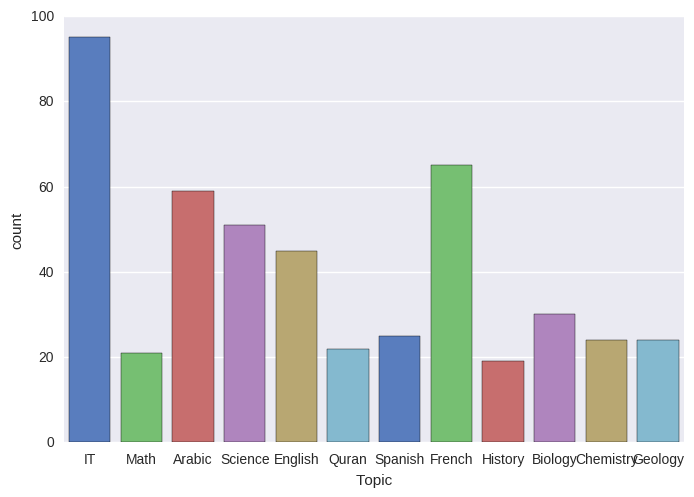

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
#breakdown by class
sns.countplot(x="Topic", data=df, palette="muted");
plt.show()

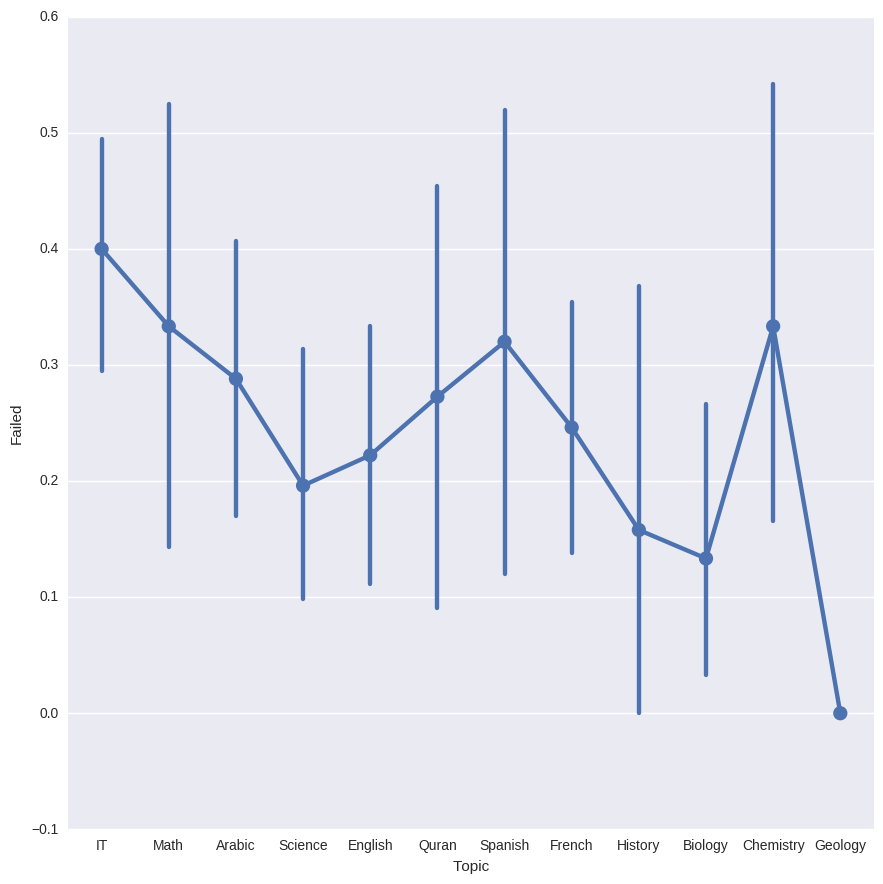

In [5]:
df['Failed'] = np.where(df['Class']=='L',1,0)
sns.factorplot('Topic','Failed',data=df,size=9)

In [6]:
pd.crosstab(df['Class'],df['Topic'])

Topic,Arabic,Biology,Chemistry,English,French,Geology,History,IT,Math,Quran,Science,Spanish
Class,,,,,,,,,,,,
H,19,16,10,17,20,6,4,15,6,8,16,5
L,17,4,8,10,16,0,3,38,7,6,10,8
M,23,10,6,18,29,18,12,42,8,8,25,12


It appears that no one failed Geology while students in IT, Chemistry, and Math had the highest probability of failing. 

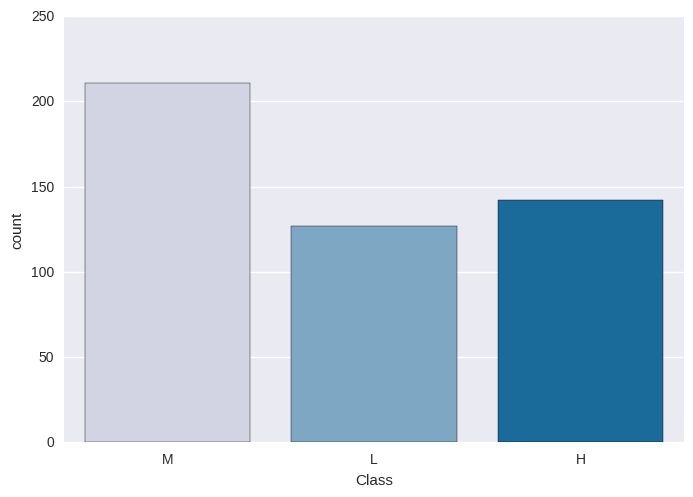

In [7]:
sns.countplot(x='Class',data=df,palette='PuBu')
plt.show()

In [8]:
df.Class.value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

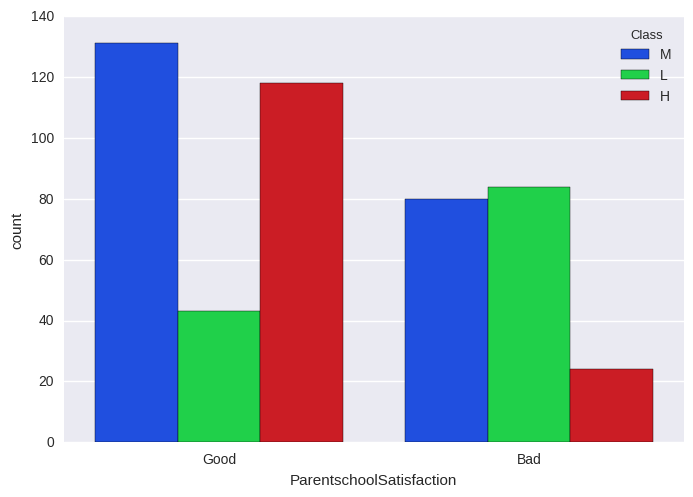

In [9]:
sns.countplot(x='ParentschoolSatisfaction',data = df, hue='Class',palette='bright')
plt.show()

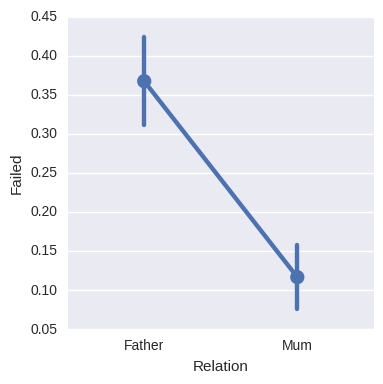

In [10]:
sns.factorplot('Relation','Failed',data=df)

From the students who did well, a large majority of their parents were satisfied with the education they received. The students whose parents were least satisfied with the school performed much worse. The students whose mothers were responsible for them had a higher chance of performing well. 

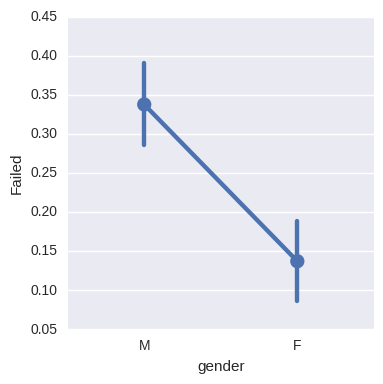

In [11]:
sns.factorplot("gender","Failed",data=df)

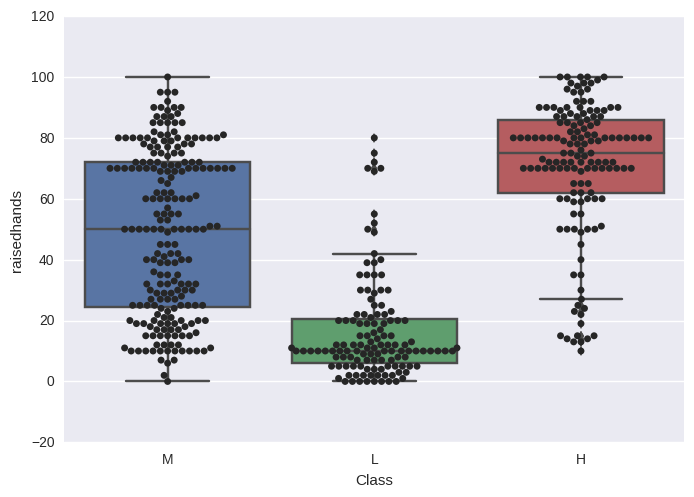

In [12]:
Raised_hand = sns.boxplot(x="Class", y="raisedhands", data=df)
Raised_hand = sns.swarmplot(x="Class", y="raisedhands", data=df, color=".15")
plt.show()

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


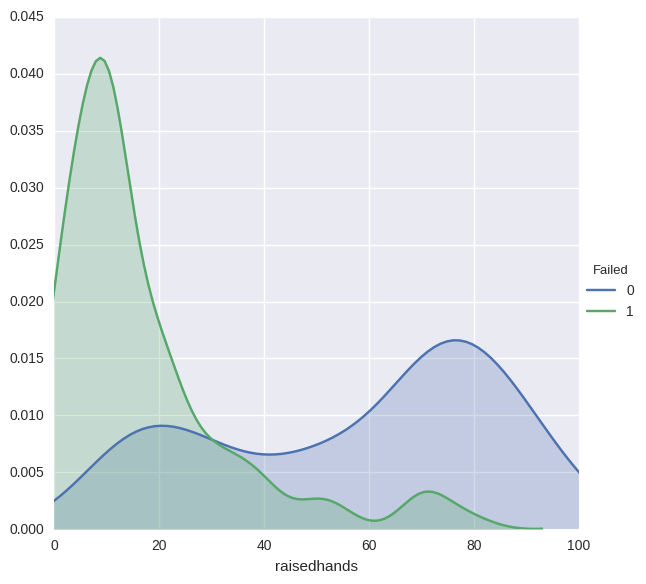

In [13]:
Facetgrid = sns.FacetGrid(df,hue='Failed',size=6)
Facetgrid.map(sns.kdeplot,'raisedhands',shade=True)
Facetgrid.set(xlim=(0,df['raisedhands'].max()))
Facetgrid.add_legend()


The boxplot analysis indicates that those who did well were more active in class, and the worst performers were the least active.

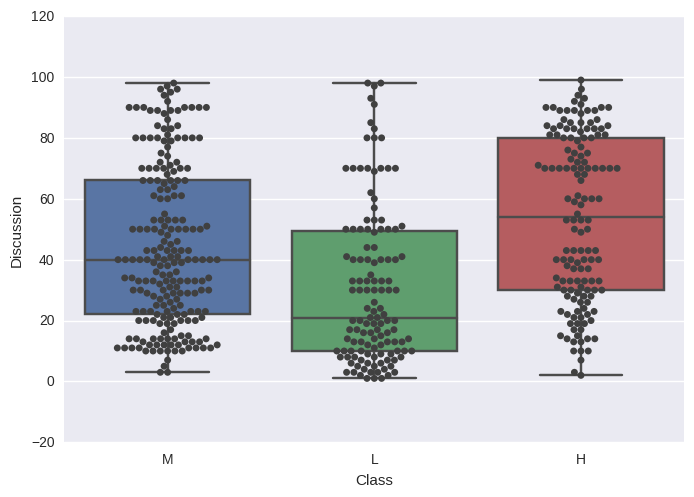

In [14]:
ax = sns.boxplot(x="Class", y="Discussion", data=df)
ax = sns.swarmplot(x="Class", y="Discussion", data=df, color=".25")
plt.show()

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


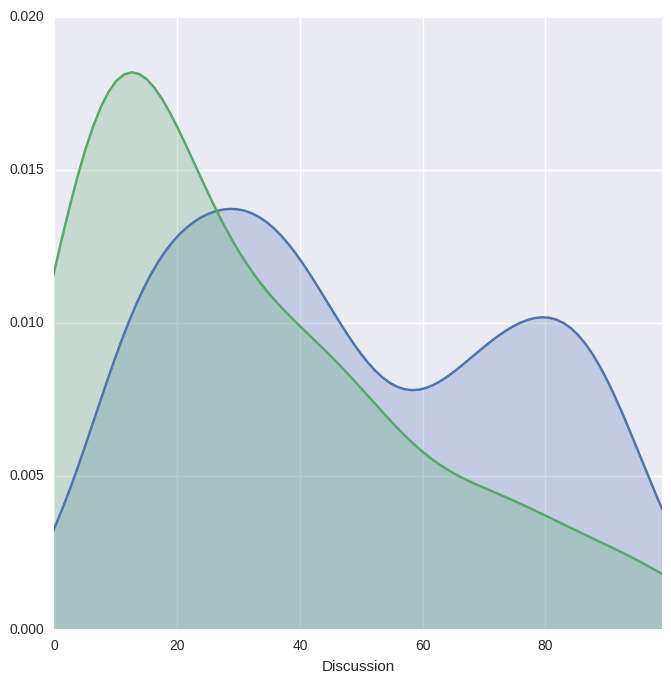

In [15]:
Facetgrid = sns.FacetGrid(df,hue='Failed',size=7)
Facetgrid.map(sns.kdeplot,'Discussion',shade=True)
Facetgrid.set(xlim=(0,df['Discussion'].max()))
plt.show()

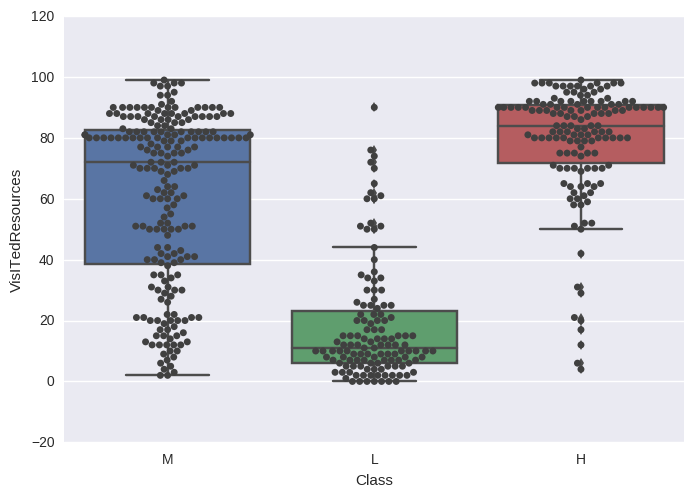

In [16]:
Vis_res = sns.boxplot(x="Class", y="VisITedResources", data=df)
Vis_res = sns.swarmplot(x="Class", y="VisITedResources", data=df, color=".25")
plt.show()

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


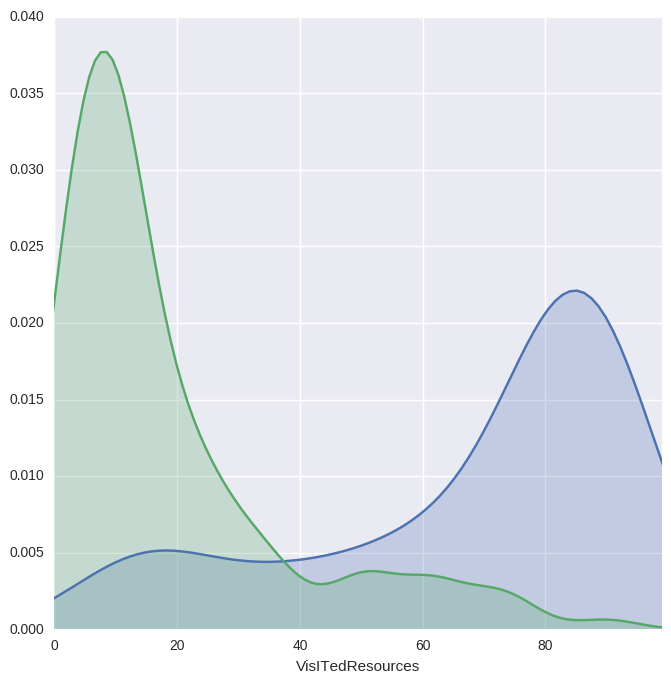

In [17]:
Facetgrid = sns.FacetGrid(df,hue='Failed',size=7)
Facetgrid.map(sns.kdeplot,'VisITedResources',shade=True)
Facetgrid.set(xlim=(0,df['VisITedResources'].max()))
plt.show()

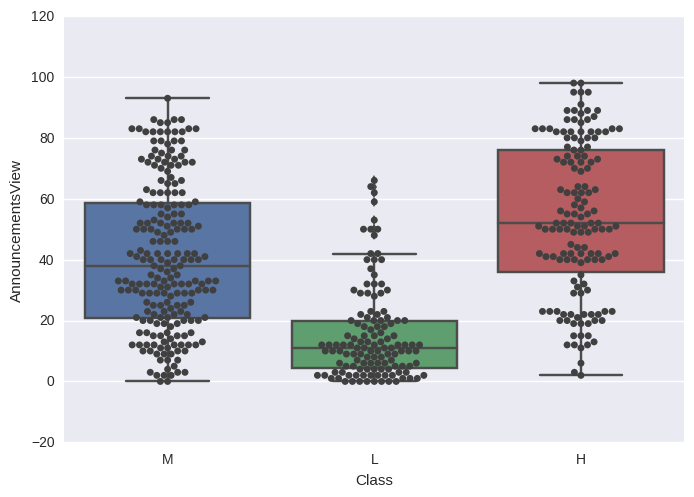

In [18]:
Anounce_bp = sns.boxplot(x="Class", y="AnnouncementsView", data=df)
Anounce_bp = sns.swarmplot(x="Class", y="AnnouncementsView", data=df, color=".25")
plt.show() 

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


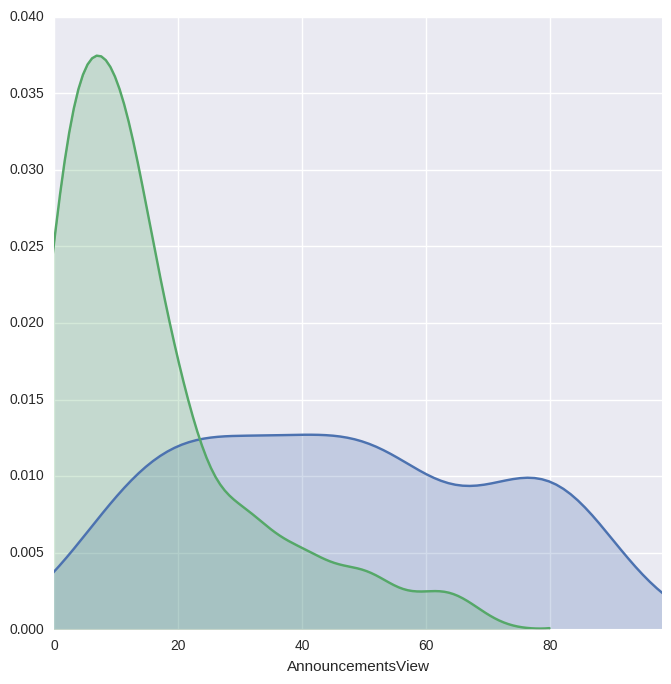

In [19]:
Facetgrid = sns.FacetGrid(df,hue='Failed',size=7)
Facetgrid.map(sns.kdeplot,'AnnouncementsView',shade=True)
Facetgrid.set(xlim=(0,df['AnnouncementsView'].max()))
plt.show()

It is clear that the lowest performers rarely visited the course resources. The swarmplot shapes also indicates that the highest and lowest performers had the most consistent habits with respect to viewing the course resources. It also appears that less students from all groups viewed course announcements, but there is still a clear pattern with viewing course announcements and how well the student performed. 

Now that we see the student's academic behavior by marks,  let's go back and see if this pattern is consistent in the Geology class.

In [20]:
df.groupby('Topic').median()


,raisedhands,VisITedResources,AnnouncementsView,Discussion,Failed
Topic,,,,,
Arabic,32.0,65.0,41.0,38.0,0.0
Biology,78.5,88.5,54.0,47.0,0.0
Chemistry,79.0,84.5,47.0,30.5,0.0
English,55.0,50.0,33.0,36.0,0.0
French,35.0,80.0,23.0,21.0,0.0
Geology,80.0,82.0,68.5,60.5,0.0
History,69.0,84.0,72.0,65.0,0.0
IT,20.0,25.0,10.0,40.0,0.0
Math,28.0,15.0,19.0,40.0,0.0


In [21]:
df['AbsBoolean'] = df['StudentAbsenceDays']
df['AbsBoolean'] = np.where(df['AbsBoolean'] == 'Under-7',0,1)
df['AbsBoolean'].groupby(df['Topic']).mean()

Topic
Arabic       0.389831
Biology      0.266667
Chemistry    0.500000
English      0.422222
French       0.323077
Geology      0.250000
History      0.473684
IT           0.473684
Math         0.476190
Quran        0.318182
Science      0.450980
Spanish      0.320000
Name: AbsBoolean, dtype: float64

The Geology students seemed to participate more frequently than those in other subjects and attended class more than those in any other subject, which could explain why none of the Geology students failed.

In [22]:
df[9:13].describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Failed,AbsBoolean
count,4.000000,4.000000,4.000000,4.000000,4.00,4.00
mean,36.000000,43.750000,18.500000,43.250000,0.25,0.25
std,29.450523,46.636002,13.127579,36.890604,0.50,0.50
min,5.000000,1.000000,0.000000,11.000000,0.00,0.00
25%,15.500000,4.750000,14.250000,11.750000,0.00,0.00
50%,34.500000,43.000000,22.000000,41.000000,0.00,0.00
75%,55.000000,82.000000,26.250000,72.500000,0.25,0.25
max,70.000000,88.000000,30.000000,80.000000,1.00,1.00


**Classification**
First, the perceptron and SVC will be trained on the continuous data.

In [23]:
df['TotalQ'] = df['Class']
df['TotalQ'].loc[df.TotalQ == 'Low-Level'] = 0.0
df['TotalQ'].loc[df.TotalQ == 'Middle-Level'] = 1.0
df['TotalQ'].loc[df.TotalQ == 'High-Level'] = 2.0

continuous_subset = df.ix[:,9:13]

X = np.array(continuous_subset).astype('float64')
y = np.array(df['TotalQ'])
X.shape

/opt/conda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


(480, 4)

In [24]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)


sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 75


In [26]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.48


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          H       0.48      0.74      0.59        39
          L       0.50      0.03      0.06        34
          M       0.48      0.55      0.51        71

avg / total       0.48      0.48      0.42       144



**Linear SVC**

In [28]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=2.0, random_state=0)
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 59


In [29]:

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.59


In [30]:

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          H       0.47      0.62      0.53        39
          L       0.69      0.85      0.76        34
          M       0.63      0.45      0.52        71

avg / total       0.60      0.59      0.58       144



**Non-linear SVC with rbf**

In [31]:
svm = SVC(kernel='rbf', random_state=0, gamma=2, C=1.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 48


In [32]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.67


The rbf SVC model performed the best on the dataset. One possible contributor to this could be that no outliers were removed.


Taking a step back, let's look at some of the categorical data. 

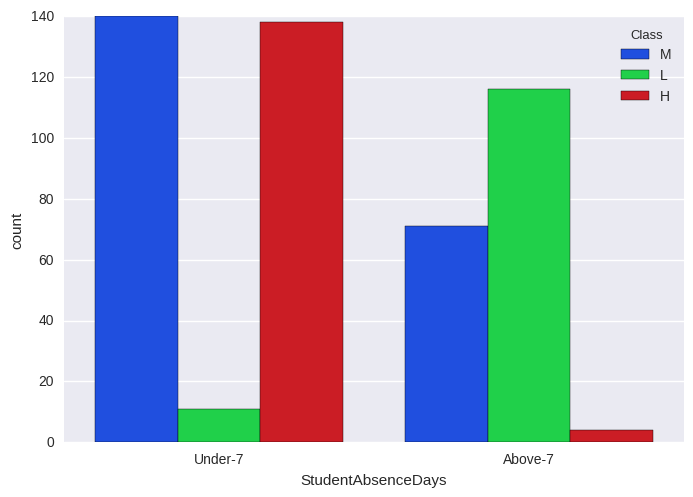

In [33]:
sns.countplot(x='StudentAbsenceDays',data = df, hue='Class',palette='bright')
plt.show()

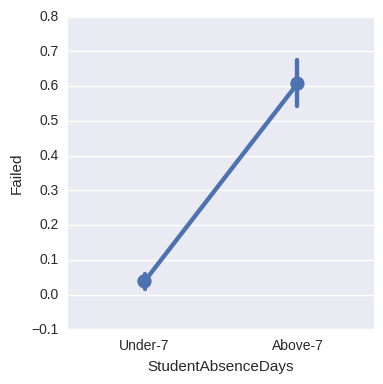

In [34]:
sns.factorplot('StudentAbsenceDays','Failed',data=df)

The biggest visual trend can be seen in how frequently the student was absent. Over 90% of the students who did poorly were absent more than seven times, while almost none of the students who did well were absent more than seven times.

We will create a dummy variable for this category, and include it in our model. 

Although parent satisfaction showed a huge pattern with respect to how well a student did in the class, there is no information on whether or not the survey was taken after grades were posted, and furthermore the attribute does not give any information about the student's classroom behavior so it was left out. 

In [35]:

continuous_subset['Absences'] = df['AbsBoolean']
X = np.array(continuous_subset).astype('float64')
y = np.array(df['TotalQ'])
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)
sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [36]:
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 33


In [37]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          H       0.73      0.56      0.64        39
          L       0.88      0.88      0.88        34
          M       0.74      0.83      0.78        71

avg / total       0.77      0.77      0.77       144



In [38]:
df.loc[(df['raisedhands']==2) & (df['VisITedResources']==9) & (df['AnnouncementsView']==7)]

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Failed,AbsBoolean,TotalQ
126,F,Iran,Iran,lowerlevel,G-02,C,IT,F,Father,2,9,7,55,Yes,Good,Under-7,M,0,0,M


In the previous version of the dataset, there was an observation with 'Total' value of '76' that is highlighted above. This was removed during exploration, and resulted in the Perceptron achieving a 57% accuracy, indicating that the outlier is influencing the accuracy of the linear classification methods. 

In [39]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
#clf = MLPClassifier(solver='lbfgs',alpha=1e-5,random_state=1)

In [40]:
sc = StandardScaler()
sc.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
clf = MLPClassifier(solver='lbfgs',alpha=.1,random_state=1)
clf.fit(X,y)
scores=cross_val_score(clf,X,y,cv=10)

In [42]:
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.64 (+/- 0.13)


Lastly, I will reproduce the original results I got during my first run through without the outlier to demonstrate it's affect on the Perceptron.

In [43]:
df = df.drop(df.index[[126]])
df.shape

(479, 20)

In [44]:
df.loc[(df['raisedhands']==2) & (df['VisITedResources']==9) & (df['AnnouncementsView']==7)]

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Failed,AbsBoolean,TotalQ


In [45]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 61


In [46]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.58
